# Import

In [3]:
import pandas as pd

import time
import numpy as np
import re
from datetime import timedelta
import pickle
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [6]:
COMPUTER_NAME = ['panda','thylacine','komodo','gila']
CUR_DIR = os.getcwd()
DATA_DIR = CUR_DIR + '/Extract_data/'
SAVE_DIR = CUR_DIR + '/Output/output_8/'

print(DATA_DIR)
print(SAVE_DIR)

if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)

/nfs/ada/jbrook1/users/qdang1/Descartes/Shooting_game/Extract_data/
/nfs/ada/jbrook1/users/qdang1/Descartes/Shooting_game/Output/output_8/


In [7]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# Load data

In [8]:
cluster_df = pd.read_csv(DATA_DIR + "cluster_24_08_17.csv")
cluster_df

,Subject_id,cluster_labels
0,AXSW,3
1,BHGY,3
2,BVCX,3
3,CVBN,1
4,DFGH,1
...,...,...
95,ZXCJ,1
96,ZXCV,3
97,ZXNM,1
98,ZXWE,1


In [9]:
cluster_df['cluster_labels'].unique()

array([3, 1, 2])

In [10]:
data_df = pd.read_csv(DATA_DIR + 'shooting_game_data_2024_10_5.csv')
data_df = data_df.merge(cluster_df,on='Subject_id',how='left')
data_df

,Subject_id,Computer_name,Block_type,Date,Session_id,Match_start,Match_end,Team_number,screenshot_kill,screenshot_death,screenshot_result,screenshot_kill_x,screenshot_death_x,screenshot_kill_y,screenshot_death_y,Total_damage_deal,Gun_damage_deal,Rocket_damage_deal,Total_damage_taken,Gun_damage_taken,Rocket_damage_taken,Total_engage,Gun_engage,Rocket_engage,Total_shot_all,Gun_shot_all,Rocket_shot_all,Total_shot_hit,Gun_shot_hit,Rocket_shot_hit,Damager_per_Second_all,Shot_per_Second_all,Damager_per_Second_Hit_only,Shot_per_Second_Hit_only,Gun_kill,Rocket_kill,Total_kill,Death_by_gun,Death_by_rocket,Total_Death,Self_kill,Game_result,Total_key_pressed,W_key,A_key,S_key,D_key,R_key,Q_key,MouseScrollDown,MouseScrollUp,SpaceBar,LeftMouseButton,RightMouseButton,Tab_key,Percent_of_Null_in_Pupil,Percent_of_Null_in_Gaze,Pupil_Average_mean,Pupil_Average_std,Pupil_Average_min,Pupil_Average_25th,Pupil_Average_50th,Pupil_Average_75th,Pupil_Average_max,Pupil_difference_mean,Pupil_difference_std,Pupil_difference_min,Pupil_difference_25th,Pupil_difference_50th,Pupil_difference_75th,Pupil_difference_max,Gaze_velocity_mean,Gaze_velocity_std,Gaze_velocity_min,Gaze_velocity_25th,Gaze_velocity_50th,Gaze_velocity_75th,Gaze_velocity_max,Heart_rate_min,Heart_rate_mean,Heart_rate_max,Heart_rate_variability,ECG_signal_to_noise,Workload,Q5_trusted_by_teamate,Q7_trusted_by_teamate,Q10_trusted_by_teamate,cluster_labels
0,BVCX,mammal_panda,baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.078449,0.096564,2.994127,0.239635,1.247559,2.831596,2.975559,3.145214,3.926987,0.118011,0.082431,0.000015,0.063885,0.108337,0.153095,1.101898,0.575337,0.906144,0.003155,0.162080,0.313574,0.642312,28.810304,58.139531,62.057990,66.666660,24.193827,10.249623,0.469900,NaN,NaN,NaN,3
1,BVCX,mammal_panda,block_01,2024-04-16,1263e8ef-4b1f-9a88-a07b-85971cac44ab,2024-04-16 10:57:55.237102-04:00,2024-04-16 11:08:10.982526-04:00,14.0,2.0,11.0,lost,2.0,11.0,2.0,11.0,210.000000,210.0,0.000000,729.192802,615.0,114.192802,17.0,17.0,0.0,141.0,141.0,0.0,14.0,14.0,0.0,3.434861,0.228991,0.341050,0.022737,2.0,0.0,2.0,10.0,1.0,11.0,0.0,lost,471.0,128.0,143.0,5.0,84.0,2.0,0.0,0.0,0.0,41.0,59.0,4.0,0.0,0.089761,0.098868,3.942543,0.341162,1.753296,3.713953,3.926895,4.169264,5.701935,0.236663,0.079815,0.000046,0.189087,0.233841,0.277786,1.881927,0.645541,1.484961,0.000929,0.147554,0.255425,0.446079,46.698817,60.975612,67.922042,76.530620,28.804732,10.532689,0.991683,11.0,11.0,73.0,3
2,BVCX,mammal_panda,block_02,2024-04-16,6ee85647-4297-186c-24fa-c4970441459c,2024-04-16 11:12:32.018475-04:00,2024-04-16 11:22:47.387228-04:00,14.0,3.0,21.0,lost,3.0,21.0,3.0,21.0,450.000000,450.0,0.000000,1583.916572,1020.0,563.916572,18.0,18.0,0.0,99.0,99.0,0.0,30.0,30.0,0.0,2.413187,0.160879,0.731269,0.048751,3.0,0.0,3.0,16.0,5.0,21.0,0.0,lost,447.0,105.0,72.0,2.0,114.0,0.0,0.0,0.0,0.0,38.0,61.0,51.0,0.0,0.178510,0.207428,3.866138,0.368855,1.699829,3.612793,3.847343,4.119331,4.987885,0.225633,0.081703,0.000092,0.177048,0.225327,0.270920,2.246033,0.646348,1.642341,0.000848,0.140304,0.238390,0.415695,68.154394,61.475420,66.558943,74.257418,26.145458,10.437539,0.973727,10.0,56.0,57.0,3
3,BVCX,mammal_panda,block_03,2024-04-16,b8103d26-48b2-edb7-9cf6-febff2e0b27b,2024-04-16 11:27:04.499339-04:00,2024-04-16 11:37:19.733358-04:00,14.0,2.0,16.0,lost,2.0,16.0,2.0,16.0,525.000000,525.0,0.000000,1035.726212,870.0,165.726212,29.0,29.0,0.0,173.0,173.0,0.0,35.0,35.0,0.0,4.217907,0.281194,0.853334,0.056889,2.0,0.0,2.0,15.0,1.0,16.0,0.0,lost,461.0,81.0,112.0,5.0,78.0,1.0,4.0,0.0,0.0,39.0,88.0,51.0,0.0,0.050896,0.057996,3.852903,0.395646,2.433792,3.561794,3.819504,4.112057,5.149445,0.216702,0.070513,0.000046,0.173111,0.214722,0.261383,1.299149,0.613583,1.632464,0.000447,0.142126,0.238046,0.406624,100.167099,61.224489,66.341846,72.463762,25.698447,10.359193,0.950541,9.

In [11]:
SESSION_LIST = data_df['Session_id'].dropna().unique()
SESSION_LIST

array(['1263e8ef-4b1f-9a88-a07b-85971cac44ab',
       '6ee85647-4297-186c-24fa-c4970441459c',
       'b8103d26-48b2-edb7-9cf6-febff2e0b27b',
       '7dcb719f-46a8-2478-bac5-4da70d64241f',
       '81378b98-41c5-d358-1442-72be5ced37bb',
       'ca5139a6-4482-929d-9f37-54910b13f6a3',
       'b2c14a1f-48d5-3766-86db-52b27a73b13b',
       '4f300843-434e-188e-ca63-70a6fceb8f72',
       '9e78a544-4fad-2033-7311-4f8a28b2f34f',
       '505ab3c0-4bfb-f248-a0ff-53be350d22d6',
       'e27612de-4620-d131-fe94-1d8df7bf34e9',
       '5d02a094-4bec-a7f8-e7d4-979a9b28ba7c',
       'd682ff1b-4c8a-9dae-d9d5-4582be12e778',
       'a8c25021-42f3-e12a-9934-d48ca28b88aa',
       '4ca89552-4100-084d-279e-7db3ac4df894',
       'f74ac41e-4abb-2c24-95ba-f6bd7a3aa0c5',
       '9d7674db-4299-49f2-09ce-408ffebe1332',
       'ff9c203a-415a-f596-d37a-289a55618e1a',
       'da70cd6f-44d0-f518-f635-5fa866148670',
       'f8e91c5d-40a0-bbcd-4b3f-869dc7f8073a',
       '85a5023a-4976-0721-23b2-028c85a483dd',
       '32143

In [12]:
SUBJECT_ID = data_df['Subject_id'].unique()
SUBJECT_ID

array(['BVCX', 'CVBN', 'DFGH', 'DFZX', 'DKLQ', 'EDFR', 'FTLD', 'GHJK',
       'GTYU', 'HGFD', 'HJKL', 'HPLX', 'JHGF', 'JKLZ', 'KJHG', 'LKJH',
       'LKMN', 'LKPW', 'LPDW', 'LPZV', 'LRTB', 'MJKL', 'MJUY', 'MNBW',
       'MNOP', 'MTYH', 'NMBV', 'OPKJ', 'PKJH', 'QAXY', 'QAZW', 'QPOI',
       'QWER', 'QWRT', 'QXZW', 'RQWE', 'SBQRG', 'SBTBT', 'SNMVN', 'SPKZR',
       'SRKLP', 'STWXJ', 'SVTZM', 'SXVBN', 'TYDF', 'TYZX', 'UYGH', 'VBNM',
       'VFTY', 'VNPL', 'WERT', 'WZXE', 'XCVH', 'XUYP', 'XZPT', 'ZRTY',
       'ZXCV', 'ZXWE', 'ZYXW'], dtype=object)

In [13]:
BLOCK_TYPE = data_df['Block_type'].unique()
BLOCK_TYPE

array(['baseline', 'block_01', 'block_02', 'block_03', 'block_04'],
      dtype=object)

In [14]:
survey_df = pd.read_csv(DATA_DIR + 'shooting_survey_data.csv')
survey_df

,userid,game_familiarity,game_questions
0,BVCX,"{\n ""BlockNo"": [\n 1\n ],\n ""Q2"": [\n ""This ...","{\n ""BlockNo"": [\n 1,\n 2,\n 3,\n 4\n ],\n..."
1,CVBN,"{\n ""BlockNo"": [\n 1\n ],\n ""Q2"": [\n ""This ...","{\n ""BlockNo"": [\n 1,\n 2,\n 3,\n 4\n ],\n..."
2,DFGH,"{\n ""BlockNo"": [\n 1\n ],\n ""Q2"": [\n ""This ...","{\n ""BlockNo"": [\n 1,\n 2,\n 3,\n 4\n ],\n..."
3,DFZX,"{\n ""BlockNo"": [\n 1\n ],\n ""Q2"": [\n ""This ...","{\n ""BlockNo"": [\n 1,\n 2,\n 3,\n 4\n ],\n..."
4,DKLQ,"{\n ""BlockNo"": [\n 1\n ],\n ""Q2"": [\n ""This ...","{\n ""BlockNo"": [\n 1,\n 2,\n 3,\n 4\n ],\n..."
5,EDFR,"{\n ""BlockNo"": [\n 1\n ],\n ""Q2"": [\n ""This ...","{\n ""BlockNo"": [\n 1,\n 2,\n 3,\n 4\n ],\n..."
6,FTLD,"{\n ""BlockNo"": [\n 1\n ],\n ""Q2"": [\n ""This ...","{\n ""BlockNo"": [\n 1,\n 2,\n 3,\n 4\n ],\n..."
7,GHJK,"{\n ""BlockNo"": [\n 1\n ],\n ""Q2"": [\n ""This ...","{\n ""BlockNo"": [\n 1,\n 2,\n 3,\n 4\n ],\n..."
8,GTYU,"{\n ""BlockNo"": [\n 1\n ],\n ""Q2"": [\n ""This ...","{\n ""BlockNo"": [\n 1,\n 2,\n 3,\n 4\n ],\n..."
9,HGFD,"{\n ""BlockNo"": [\n 1\n ],\n ""Q2"": [\n ""This ...","{\n ""BlockNo"": [\n 1,\n 2,\n 3,\n 4\n ],\n..."


In [15]:
game_fami = survey_df['game_familiarity'].apply(eval).apply(pd.Series) #extract json
game_fami = game_fami.applymap(lambda x: x[0]) #remove list
game_fami = pd.concat([survey_df['userid'],game_fami.drop('BlockNo',axis=1)],axis=1) #add userid
game_fami = game_fami.rename({'userid': 'Subject_id'},axis=1)
game_fami

/tmp/ipykernel_99137/1187921412.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  game_fami = game_fami.applymap(lambda x: x[0]) #remove list


,Subject_id,Q2,Q3,Q4
0,BVCX,This person is a friend. I know this person we...,This person is a stranger. I am meeting them f...,This person is a stranger. I am meeting them f...
1,CVBN,This person is a friend. I know this person we...,This person is a stranger. I am meeting them f...,This person is a stranger. I am meeting them f...
2,DFGH,This person is a friend. I know this person we...,This person is a stranger. I am meeting them f...,This person is a stranger. I am meeting them f...
3,DFZX,This person is a stranger. I am meeting them f...,This person is a stranger. I am meeting them f...,This person is a stranger. I am meeting them f...
4,DKLQ,This person is a stranger. I am meeting them f...,This person is a stranger. I am meeting them f...,This person is a friend. I know this person we...
5,EDFR,This person is a stranger. I am meeting them f...,This person is a stranger. I am meeting them f...,This person is a stranger. I am meeting them f...
6,FTLD,This person is a friend. I know this person we...,This person is a friend. I know this person we...,This person is a friend. I know this person we...
7,GHJK,This person is a stranger. I am meeting them f...,This person is a stranger. I am meeting them f...,This person is a stranger. I am meeting them f...
8,GTYU,This person is an acquaintance. I have spoken ...,This person is an acquaintance. I have spoken ...,This person is an acquaintance. I have spoken ...
9,HGFD,This person is a stranger. I am meeting them f...,This person is a friend. I know this person we...,This person is a stranger. I am meeting them f...


# Preprocessing

In [16]:
for session in SESSION_LIST:
    mask = data_df['Session_id'] == session
    #filter na
    if pd.isna(data_df.loc[mask][['screenshot_kill','screenshot_death','Total_kill','Total_Death','Self_kill']]).sum().sum() > 0:
        continue
    
    missing_percent = data_df[mask][['Total_kill','Total_Death','Self_kill']].sum().sum() /  data_df[mask][['screenshot_kill','screenshot_death']].sum().sum()
    data_df.loc[mask,'Missing_percent'] = missing_percent
data_df

,Subject_id,Computer_name,Block_type,Date,Session_id,Match_start,Match_end,Team_number,screenshot_kill,screenshot_death,screenshot_result,screenshot_kill_x,screenshot_death_x,screenshot_kill_y,screenshot_death_y,Total_damage_deal,Gun_damage_deal,Rocket_damage_deal,Total_damage_taken,Gun_damage_taken,Rocket_damage_taken,Total_engage,Gun_engage,Rocket_engage,Total_shot_all,Gun_shot_all,Rocket_shot_all,Total_shot_hit,Gun_shot_hit,Rocket_shot_hit,Damager_per_Second_all,Shot_per_Second_all,Damager_per_Second_Hit_only,Shot_per_Second_Hit_only,Gun_kill,Rocket_kill,Total_kill,Death_by_gun,Death_by_rocket,Total_Death,Self_kill,Game_result,Total_key_pressed,W_key,A_key,S_key,D_key,R_key,Q_key,MouseScrollDown,MouseScrollUp,SpaceBar,LeftMouseButton,RightMouseButton,Tab_key,Percent_of_Null_in_Pupil,Percent_of_Null_in_Gaze,Pupil_Average_mean,Pupil_Average_std,Pupil_Average_min,Pupil_Average_25th,Pupil_Average_50th,Pupil_Average_75th,Pupil_Average_max,Pupil_difference_mean,Pupil_difference_std,Pupil_difference_min,Pupil_difference_25th,Pupil_difference_50th,Pupil_difference_75th,Pupil_difference_max,Gaze_velocity_mean,Gaze_velocity_std,Gaze_velocity_min,Gaze_velocity_25th,Gaze_velocity_50th,Gaze_velocity_75th,Gaze_velocity_max,Heart_rate_min,Heart_rate_mean,Heart_rate_max,Heart_rate_variability,ECG_signal_to_noise,Workload,Q5_trusted_by_teamate,Q7_trusted_by_teamate,Q10_trusted_by_teamate,cluster_labels,Missing_percent
0,BVCX,mammal_panda,baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.078449,0.096564,2.994127,0.239635,1.247559,2.831596,2.975559,3.145214,3.926987,0.118011,0.082431,0.000015,0.063885,0.108337,0.153095,1.101898,0.575337,0.906144,0.003155,0.162080,0.313574,0.642312,28.810304,58.139531,62.057990,66.666660,24.193827,10.249623,0.469900,NaN,NaN,NaN,3,NaN
1,BVCX,mammal_panda,block_01,2024-04-16,1263e8ef-4b1f-9a88-a07b-85971cac44ab,2024-04-16 10:57:55.237102-04:00,2024-04-16 11:08:10.982526-04:00,14.0,2.0,11.0,lost,2.0,11.0,2.0,11.0,210.000000,210.0,0.000000,729.192802,615.0,114.192802,17.0,17.0,0.0,141.0,141.0,0.0,14.0,14.0,0.0,3.434861,0.228991,0.341050,0.022737,2.0,0.0,2.0,10.0,1.0,11.0,0.0,lost,471.0,128.0,143.0,5.0,84.0,2.0,0.0,0.0,0.0,41.0,59.0,4.0,0.0,0.089761,0.098868,3.942543,0.341162,1.753296,3.713953,3.926895,4.169264,5.701935,0.236663,0.079815,0.000046,0.189087,0.233841,0.277786,1.881927,0.645541,1.484961,0.000929,0.147554,0.255425,0.446079,46.698817,60.975612,67.922042,76.530620,28.804732,10.532689,0.991683,11.0,11.0,73.0,3,1.0
2,BVCX,mammal_panda,block_02,2024-04-16,6ee85647-4297-186c-24fa-c4970441459c,2024-04-16 11:12:32.018475-04:00,2024-04-16 11:22:47.387228-04:00,14.0,3.0,21.0,lost,3.0,21.0,3.0,21.0,450.000000,450.0,0.000000,1583.916572,1020.0,563.916572,18.0,18.0,0.0,99.0,99.0,0.0,30.0,30.0,0.0,2.413187,0.160879,0.731269,0.048751,3.0,0.0,3.0,16.0,5.0,21.0,0.0,lost,447.0,105.0,72.0,2.0,114.0,0.0,0.0,0.0,0.0,38.0,61.0,51.0,0.0,0.178510,0.207428,3.866138,0.368855,1.699829,3.612793,3.847343,4.119331,4.987885,0.225633,0.081703,0.000092,0.177048,0.225327,0.270920,2.246033,0.646348,1.642341,0.000848,0.140304,0.238390,0.415695,68.154394,61.475420,66.558943,74.257418,26.145458,10.437539,0.973727,10.0,56.0,57.0,3,1.0
3,BVCX,mammal_panda,block_03,2024-04-16,b8103d26-48b2-edb7-9cf6-febff2e0b27b,2024-04-16 11:27:04.499339-04:00,2024-04-16 11:37:19.733358-04:00,14.0,2.0,16.0,lost,2.0,16.0,2.0,16.0,525.000000,525.0,0.000000,1035.726212,870.0,165.726212,29.0,29.0,0.0,173.0,173.0,0.0,35.0,35.0,0.0,4.217907,0.281194,0.853334,0.056889,2.0,0.0,2.0,15.0,1.0,16.0,0.0,lost,461.0,81.0,112.0,5.0,78.0,1.0,4.0,0.0,0.0,39.0,88.0,51.0,0.0,0.050896,0.057996,3.852903,0.395646,2.433792,3.561794,3.819504,4.112057,5.149445,0.216702,0.070513,0.000046,0.173111,0.214722,0.261383,1.299149,0.613583,1.632464,0.000447,0.142126,0.238046,0.406624,100.167099,61.224489,66.341846,72.463762,25.

In [17]:
data_df.loc[data_df['Block_type'] == 'baseline', 'Missing_percent'] = 1
data_df

,Subject_id,Computer_name,Block_type,Date,Session_id,Match_start,Match_end,Team_number,screenshot_kill,screenshot_death,screenshot_result,screenshot_kill_x,screenshot_death_x,screenshot_kill_y,screenshot_death_y,Total_damage_deal,Gun_damage_deal,Rocket_damage_deal,Total_damage_taken,Gun_damage_taken,Rocket_damage_taken,Total_engage,Gun_engage,Rocket_engage,Total_shot_all,Gun_shot_all,Rocket_shot_all,Total_shot_hit,Gun_shot_hit,Rocket_shot_hit,Damager_per_Second_all,Shot_per_Second_all,Damager_per_Second_Hit_only,Shot_per_Second_Hit_only,Gun_kill,Rocket_kill,Total_kill,Death_by_gun,Death_by_rocket,Total_Death,Self_kill,Game_result,Total_key_pressed,W_key,A_key,S_key,D_key,R_key,Q_key,MouseScrollDown,MouseScrollUp,SpaceBar,LeftMouseButton,RightMouseButton,Tab_key,Percent_of_Null_in_Pupil,Percent_of_Null_in_Gaze,Pupil_Average_mean,Pupil_Average_std,Pupil_Average_min,Pupil_Average_25th,Pupil_Average_50th,Pupil_Average_75th,Pupil_Average_max,Pupil_difference_mean,Pupil_difference_std,Pupil_difference_min,Pupil_difference_25th,Pupil_difference_50th,Pupil_difference_75th,Pupil_difference_max,Gaze_velocity_mean,Gaze_velocity_std,Gaze_velocity_min,Gaze_velocity_25th,Gaze_velocity_50th,Gaze_velocity_75th,Gaze_velocity_max,Heart_rate_min,Heart_rate_mean,Heart_rate_max,Heart_rate_variability,ECG_signal_to_noise,Workload,Q5_trusted_by_teamate,Q7_trusted_by_teamate,Q10_trusted_by_teamate,cluster_labels,Missing_percent
0,BVCX,mammal_panda,baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.078449,0.096564,2.994127,0.239635,1.247559,2.831596,2.975559,3.145214,3.926987,0.118011,0.082431,0.000015,0.063885,0.108337,0.153095,1.101898,0.575337,0.906144,0.003155,0.162080,0.313574,0.642312,28.810304,58.139531,62.057990,66.666660,24.193827,10.249623,0.469900,NaN,NaN,NaN,3,1.0
1,BVCX,mammal_panda,block_01,2024-04-16,1263e8ef-4b1f-9a88-a07b-85971cac44ab,2024-04-16 10:57:55.237102-04:00,2024-04-16 11:08:10.982526-04:00,14.0,2.0,11.0,lost,2.0,11.0,2.0,11.0,210.000000,210.0,0.000000,729.192802,615.0,114.192802,17.0,17.0,0.0,141.0,141.0,0.0,14.0,14.0,0.0,3.434861,0.228991,0.341050,0.022737,2.0,0.0,2.0,10.0,1.0,11.0,0.0,lost,471.0,128.0,143.0,5.0,84.0,2.0,0.0,0.0,0.0,41.0,59.0,4.0,0.0,0.089761,0.098868,3.942543,0.341162,1.753296,3.713953,3.926895,4.169264,5.701935,0.236663,0.079815,0.000046,0.189087,0.233841,0.277786,1.881927,0.645541,1.484961,0.000929,0.147554,0.255425,0.446079,46.698817,60.975612,67.922042,76.530620,28.804732,10.532689,0.991683,11.0,11.0,73.0,3,1.0
2,BVCX,mammal_panda,block_02,2024-04-16,6ee85647-4297-186c-24fa-c4970441459c,2024-04-16 11:12:32.018475-04:00,2024-04-16 11:22:47.387228-04:00,14.0,3.0,21.0,lost,3.0,21.0,3.0,21.0,450.000000,450.0,0.000000,1583.916572,1020.0,563.916572,18.0,18.0,0.0,99.0,99.0,0.0,30.0,30.0,0.0,2.413187,0.160879,0.731269,0.048751,3.0,0.0,3.0,16.0,5.0,21.0,0.0,lost,447.0,105.0,72.0,2.0,114.0,0.0,0.0,0.0,0.0,38.0,61.0,51.0,0.0,0.178510,0.207428,3.866138,0.368855,1.699829,3.612793,3.847343,4.119331,4.987885,0.225633,0.081703,0.000092,0.177048,0.225327,0.270920,2.246033,0.646348,1.642341,0.000848,0.140304,0.238390,0.415695,68.154394,61.475420,66.558943,74.257418,26.145458,10.437539,0.973727,10.0,56.0,57.0,3,1.0
3,BVCX,mammal_panda,block_03,2024-04-16,b8103d26-48b2-edb7-9cf6-febff2e0b27b,2024-04-16 11:27:04.499339-04:00,2024-04-16 11:37:19.733358-04:00,14.0,2.0,16.0,lost,2.0,16.0,2.0,16.0,525.000000,525.0,0.000000,1035.726212,870.0,165.726212,29.0,29.0,0.0,173.0,173.0,0.0,35.0,35.0,0.0,4.217907,0.281194,0.853334,0.056889,2.0,0.0,2.0,15.0,1.0,16.0,0.0,lost,461.0,81.0,112.0,5.0,78.0,1.0,4.0,0.0,0.0,39.0,88.0,51.0,0.0,0.050896,0.057996,3.852903,0.395646,2.433792,3.561794,3.819504,4.112057,5.149445,0.216702,0.070513,0.000046,0.173111,0.214722,0.261383,1.299149,0.613583,1.632464,0.000447,0.142126,0.238046,0.406624,100.167099,61.224489,66.341846,72.463762,25.

In [18]:
NORMALIZE_COLUMNS = ['Total_damage_deal','Gun_damage_deal','Rocket_damage_deal',
                     'Total_damage_taken','Gun_damage_taken','Rocket_damage_taken',
                     'Total_engage','Gun_engage','Rocket_engage',
                     'Total_shot_all','Gun_shot_all','Rocket_shot_all',
                     'Total_shot_hit','Gun_shot_hit','Rocket_shot_hit',
                     'Damager_per_Second_all','Shot_per_Second_all','Damager_per_Second_Hit_only','Shot_per_Second_Hit_only',
                     'Gun_kill','Gun_shot_hit','Rocket_shot_hit',
                     'Total_shot_hit','Rocket_kill','Total_kill',
                     'Death_by_gun','Death_by_rocket','Total_Death',
                     'Total_key_pressed','W_key','A_key','S_key','D_key','R_key','Q_key',
                     'MouseScrollDown','MouseScrollUp','SpaceBar',
                     'LeftMouseButton','RightMouseButton','Tab_key',
                    ]

In [19]:
#normalize data by divide missing percentage
data_df_normalize = data_df.copy()

mask = data_df_normalize['Missing_percent'] > 0.7
for column in NORMALIZE_COLUMNS:
    data_df_normalize.loc[mask,column] = data_df_normalize.loc[mask,column]/data_df_normalize.loc[mask,'Missing_percent']
    
data_df_normalize

,Subject_id,Computer_name,Block_type,Date,Session_id,Match_start,Match_end,Team_number,screenshot_kill,screenshot_death,screenshot_result,screenshot_kill_x,screenshot_death_x,screenshot_kill_y,screenshot_death_y,Total_damage_deal,Gun_damage_deal,Rocket_damage_deal,Total_damage_taken,Gun_damage_taken,Rocket_damage_taken,Total_engage,Gun_engage,Rocket_engage,Total_shot_all,Gun_shot_all,Rocket_shot_all,Total_shot_hit,Gun_shot_hit,Rocket_shot_hit,Damager_per_Second_all,Shot_per_Second_all,Damager_per_Second_Hit_only,Shot_per_Second_Hit_only,Gun_kill,Rocket_kill,Total_kill,Death_by_gun,Death_by_rocket,Total_Death,Self_kill,Game_result,Total_key_pressed,W_key,A_key,S_key,D_key,R_key,Q_key,MouseScrollDown,MouseScrollUp,SpaceBar,LeftMouseButton,RightMouseButton,Tab_key,Percent_of_Null_in_Pupil,Percent_of_Null_in_Gaze,Pupil_Average_mean,Pupil_Average_std,Pupil_Average_min,Pupil_Average_25th,Pupil_Average_50th,Pupil_Average_75th,Pupil_Average_max,Pupil_difference_mean,Pupil_difference_std,Pupil_difference_min,Pupil_difference_25th,Pupil_difference_50th,Pupil_difference_75th,Pupil_difference_max,Gaze_velocity_mean,Gaze_velocity_std,Gaze_velocity_min,Gaze_velocity_25th,Gaze_velocity_50th,Gaze_velocity_75th,Gaze_velocity_max,Heart_rate_min,Heart_rate_mean,Heart_rate_max,Heart_rate_variability,ECG_signal_to_noise,Workload,Q5_trusted_by_teamate,Q7_trusted_by_teamate,Q10_trusted_by_teamate,cluster_labels,Missing_percent
0,BVCX,mammal_panda,baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.078449,0.096564,2.994127,0.239635,1.247559,2.831596,2.975559,3.145214,3.926987,0.118011,0.082431,0.000015,0.063885,0.108337,0.153095,1.101898,0.575337,0.906144,0.003155,0.162080,0.313574,0.642312,28.810304,58.139531,62.057990,66.666660,24.193827,10.249623,0.469900,NaN,NaN,NaN,3,1.0
1,BVCX,mammal_panda,block_01,2024-04-16,1263e8ef-4b1f-9a88-a07b-85971cac44ab,2024-04-16 10:57:55.237102-04:00,2024-04-16 11:08:10.982526-04:00,14.0,2.0,11.0,lost,2.0,11.0,2.0,11.0,210.000000,210.0,0.000000,729.192802,615.0,114.192802,17.0,17.0,0.0,141.0,141.0,0.0,14.0,14.0,0.0,3.434861,0.228991,0.341050,0.022737,2.0,0.0,2.0,10.0,1.0,11.0,0.0,lost,471.0,128.0,143.0,5.0,84.0,2.0,0.0,0.0,0.0,41.0,59.0,4.0,0.0,0.089761,0.098868,3.942543,0.341162,1.753296,3.713953,3.926895,4.169264,5.701935,0.236663,0.079815,0.000046,0.189087,0.233841,0.277786,1.881927,0.645541,1.484961,0.000929,0.147554,0.255425,0.446079,46.698817,60.975612,67.922042,76.530620,28.804732,10.532689,0.991683,11.0,11.0,73.0,3,1.0
2,BVCX,mammal_panda,block_02,2024-04-16,6ee85647-4297-186c-24fa-c4970441459c,2024-04-16 11:12:32.018475-04:00,2024-04-16 11:22:47.387228-04:00,14.0,3.0,21.0,lost,3.0,21.0,3.0,21.0,450.000000,450.0,0.000000,1583.916572,1020.0,563.916572,18.0,18.0,0.0,99.0,99.0,0.0,30.0,30.0,0.0,2.413187,0.160879,0.731269,0.048751,3.0,0.0,3.0,16.0,5.0,21.0,0.0,lost,447.0,105.0,72.0,2.0,114.0,0.0,0.0,0.0,0.0,38.0,61.0,51.0,0.0,0.178510,0.207428,3.866138,0.368855,1.699829,3.612793,3.847343,4.119331,4.987885,0.225633,0.081703,0.000092,0.177048,0.225327,0.270920,2.246033,0.646348,1.642341,0.000848,0.140304,0.238390,0.415695,68.154394,61.475420,66.558943,74.257418,26.145458,10.437539,0.973727,10.0,56.0,57.0,3,1.0
3,BVCX,mammal_panda,block_03,2024-04-16,b8103d26-48b2-edb7-9cf6-febff2e0b27b,2024-04-16 11:27:04.499339-04:00,2024-04-16 11:37:19.733358-04:00,14.0,2.0,16.0,lost,2.0,16.0,2.0,16.0,525.000000,525.0,0.000000,1035.726212,870.0,165.726212,29.0,29.0,0.0,173.0,173.0,0.0,35.0,35.0,0.0,4.217907,0.281194,0.853334,0.056889,2.0,0.0,2.0,15.0,1.0,16.0,0.0,lost,461.0,81.0,112.0,5.0,78.0,1.0,4.0,0.0,0.0,39.0,88.0,51.0,0.0,0.050896,0.057996,3.852903,0.395646,2.433792,3.561794,3.819504,4.112057,5.149445,0.216702,0.070513,0.000046,0.173111,0.214722,0.261383,1.299149,0.613583,1.632464,0.000447,0.142126,0.238046,0.406624,100.167099,61.224489,66.341846,72.463762,25.

In [20]:
# calculate final result
# Define a function to apply the conditions and calculate 'final_result'
def calculate_final_result(row):
    if row['Block_type'] == 'baseline':
        return np.nan
    if not pd.isnull(row['screenshot_result']):
        return row['screenshot_result']
    elif not pd.isnull(row['Game_result']) and (row['Total_kill'] + row['Total_Death'] + row['Self_kill']) > 10:
        return row['Game_result']
    else:
        grouped = data_df_normalize[data_df_normalize['Subject_id'] == row['Subject_id']]
        if (grouped['screenshot_result'] == 'win').sum() >= 3:
            return 'win'
        elif (grouped['screenshot_result'] == 'lost').sum() >= 3:
            return 'lost'
        else:
            return np.nan

# Apply the function to create the 'final_result' column
data_df_normalize['final_result'] = data_df_normalize.apply(calculate_final_result, axis=1)


In [21]:
# Loop through each unique team number
for team_number in data_df_normalize['Team_number'].unique():
    # Filter the DataFrame for the current team number
    mask = data_df_normalize['Team_number'] == team_number
    unique_cluster = data_df_normalize.loc[mask]['cluster_labels'].unique()
    
    
    if len(unique_cluster) == 0:
        #empty case
        continue
    
    if len(unique_cluster) == 1:
        if 1 in unique_cluster:
            cluster_type = '(1,1)'
        if 2 in unique_cluster:
            cluster_type = '(2,2)'
        if 3 in unique_cluster:
            cluster_type = '(3,3)'

    if len(unique_cluster) == 2:
        if 1 in unique_cluster and 2 in unique_cluster:
            cluster_type = '(1,2)'
        if 1 in unique_cluster and 3 in unique_cluster:
            cluster_type = '(1,3)'
        if 2 in unique_cluster and 3 in unique_cluster:
            cluster_type = '(2,3)'

    data_df_normalize.loc[mask,"Team_type"] = cluster_type


In [22]:
data_df_normalize

,Subject_id,Computer_name,Block_type,Date,Session_id,Match_start,Match_end,Team_number,screenshot_kill,screenshot_death,screenshot_result,screenshot_kill_x,screenshot_death_x,screenshot_kill_y,screenshot_death_y,Total_damage_deal,Gun_damage_deal,Rocket_damage_deal,Total_damage_taken,Gun_damage_taken,Rocket_damage_taken,Total_engage,Gun_engage,Rocket_engage,Total_shot_all,Gun_shot_all,Rocket_shot_all,Total_shot_hit,Gun_shot_hit,Rocket_shot_hit,Damager_per_Second_all,Shot_per_Second_all,Damager_per_Second_Hit_only,Shot_per_Second_Hit_only,Gun_kill,Rocket_kill,Total_kill,Death_by_gun,Death_by_rocket,Total_Death,Self_kill,Game_result,Total_key_pressed,W_key,A_key,S_key,D_key,R_key,Q_key,MouseScrollDown,MouseScrollUp,SpaceBar,LeftMouseButton,RightMouseButton,Tab_key,Percent_of_Null_in_Pupil,Percent_of_Null_in_Gaze,Pupil_Average_mean,Pupil_Average_std,Pupil_Average_min,Pupil_Average_25th,Pupil_Average_50th,Pupil_Average_75th,Pupil_Average_max,Pupil_difference_mean,Pupil_difference_std,Pupil_difference_min,Pupil_difference_25th,Pupil_difference_50th,Pupil_difference_75th,Pupil_difference_max,Gaze_velocity_mean,Gaze_velocity_std,Gaze_velocity_min,Gaze_velocity_25th,Gaze_velocity_50th,Gaze_velocity_75th,Gaze_velocity_max,Heart_rate_min,Heart_rate_mean,Heart_rate_max,Heart_rate_variability,ECG_signal_to_noise,Workload,Q5_trusted_by_teamate,Q7_trusted_by_teamate,Q10_trusted_by_teamate,cluster_labels,Missing_percent,final_result,Team_type
0,BVCX,mammal_panda,baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.078449,0.096564,2.994127,0.239635,1.247559,2.831596,2.975559,3.145214,3.926987,0.118011,0.082431,0.000015,0.063885,0.108337,0.153095,1.101898,0.575337,0.906144,0.003155,0.162080,0.313574,0.642312,28.810304,58.139531,62.057990,66.666660,24.193827,10.249623,0.469900,NaN,NaN,NaN,3,1.0,NaN,NaN
1,BVCX,mammal_panda,block_01,2024-04-16,1263e8ef-4b1f-9a88-a07b-85971cac44ab,2024-04-16 10:57:55.237102-04:00,2024-04-16 11:08:10.982526-04:00,14.0,2.0,11.0,lost,2.0,11.0,2.0,11.0,210.000000,210.0,0.000000,729.192802,615.0,114.192802,17.0,17.0,0.0,141.0,141.0,0.0,14.0,14.0,0.0,3.434861,0.228991,0.341050,0.022737,2.0,0.0,2.0,10.0,1.0,11.0,0.0,lost,471.0,128.0,143.0,5.0,84.0,2.0,0.0,0.0,0.0,41.0,59.0,4.0,0.0,0.089761,0.098868,3.942543,0.341162,1.753296,3.713953,3.926895,4.169264,5.701935,0.236663,0.079815,0.000046,0.189087,0.233841,0.277786,1.881927,0.645541,1.484961,0.000929,0.147554,0.255425,0.446079,46.698817,60.975612,67.922042,76.530620,28.804732,10.532689,0.991683,11.0,11.0,73.0,3,1.0,lost,"(1,3)"
2,BVCX,mammal_panda,block_02,2024-04-16,6ee85647-4297-186c-24fa-c4970441459c,2024-04-16 11:12:32.018475-04:00,2024-04-16 11:22:47.387228-04:00,14.0,3.0,21.0,lost,3.0,21.0,3.0,21.0,450.000000,450.0,0.000000,1583.916572,1020.0,563.916572,18.0,18.0,0.0,99.0,99.0,0.0,30.0,30.0,0.0,2.413187,0.160879,0.731269,0.048751,3.0,0.0,3.0,16.0,5.0,21.0,0.0,lost,447.0,105.0,72.0,2.0,114.0,0.0,0.0,0.0,0.0,38.0,61.0,51.0,0.0,0.178510,0.207428,3.866138,0.368855,1.699829,3.612793,3.847343,4.119331,4.987885,0.225633,0.081703,0.000092,0.177048,0.225327,0.270920,2.246033,0.646348,1.642341,0.000848,0.140304,0.238390,0.415695,68.154394,61.475420,66.558943,74.257418,26.145458,10.437539,0.973727,10.0,56.0,57.0,3,1.0,lost,"(1,3)"
3,BVCX,mammal_panda,block_03,2024-04-16,b8103d26-48b2-edb7-9cf6-febff2e0b27b,2024-04-16 11:27:04.499339-04:00,2024-04-16 11:37:19.733358-04:00,14.0,2.0,16.0,lost,2.0,16.0,2.0,16.0,525.000000,525.0,0.000000,1035.726212,870.0,165.726212,29.0,29.0,0.0,173.0,173.0,0.0,35.0,35.0,0.0,4.217907,0.281194,0.853334,0.056889,2.0,0.0,2.0,15.0,1.0,16.0,0.0,lost,461.0,81.0,112.0,5.0,78.0,1.0,4.0,0.0,0.0,39.0,88.0,51.0,0.0,0.050896,0.057996,3.852903,0.395646,2.433792,3.561794,3.819504,4.112057,5.149445,0.216702,0.070513,0.000046,0.173111,0.214722,0.261383,1.299149,0.613583,1.632464,0.000447,0.142126,0.238

# Ploting

/tmp/ipykernel_99137/432607899.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Accuracy'] = filtered_df['Total_shot_hit'] / filtered_df['Total_shot_all']


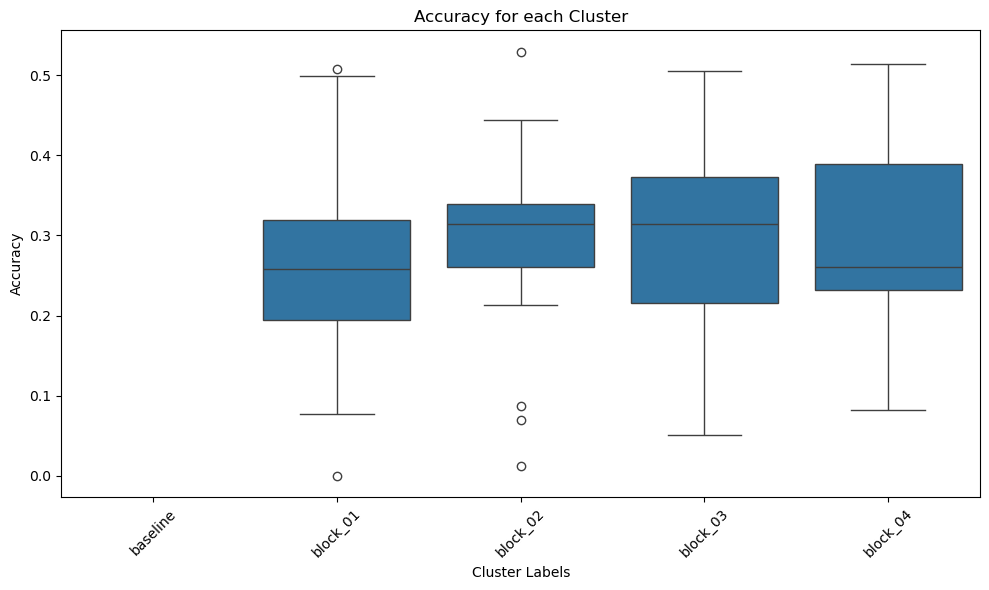

In [23]:
# Filter the DataFrame based on the condition 'Missing_percent' > 0.7
filtered_df = data_df_normalize[data_df_normalize['Missing_percent'] > 0.7]

# Calculate accuracy
filtered_df['Accuracy'] = filtered_df['Total_shot_hit'] / filtered_df['Total_shot_all']

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Block_type', y='Accuracy', data=filtered_df)
plt.title('Accuracy for each Cluster')
plt.xlabel('Cluster Labels')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
#plt.grid(axis='y')
plt.tight_layout()
#plt.savefig(SAVE_DIR + "accuracy_boxplot.png", dpi=500)
plt.show()

/tmp/ipykernel_99137/477697392.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Accuracy'] = filtered_df['Total_shot_hit'] / filtered_df['Total_shot_all']


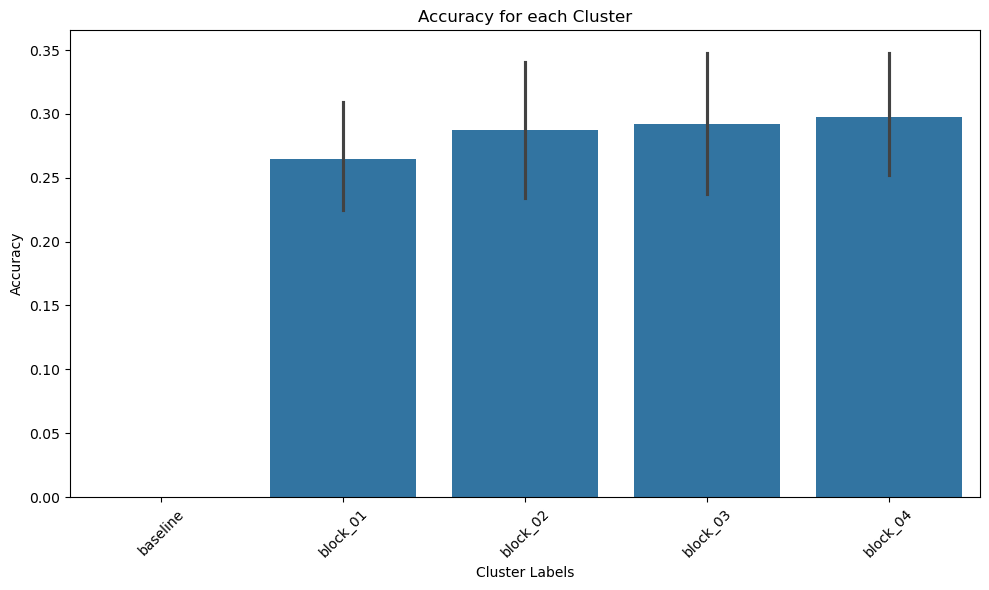

In [24]:
# Filter the DataFrame based on the condition 'Missing_percent' > 0.7
filtered_df = data_df_normalize[data_df_normalize['Missing_percent'] > 0.7]

# Calculate accuracy
filtered_df['Accuracy'] = filtered_df['Total_shot_hit'] / filtered_df['Total_shot_all']

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Block_type', y='Accuracy', data=filtered_df)
plt.title('Accuracy for each Cluster')
plt.xlabel('Cluster Labels')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
#plt.grid(axis='y')
plt.tight_layout()
#plt.savefig(SAVE_DIR + "accuracy_boxplot.png", dpi=500)
plt.show()

/tmp/ipykernel_99137/1246370642.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Accuracy'] = filtered_df['Total_shot_hit'] / filtered_df['Total_shot_all']
/tmp/ipykernel_99137/1246370642.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Total_damage_deal'] = filtered_df['Total_damage_deal'] / 1000
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finit

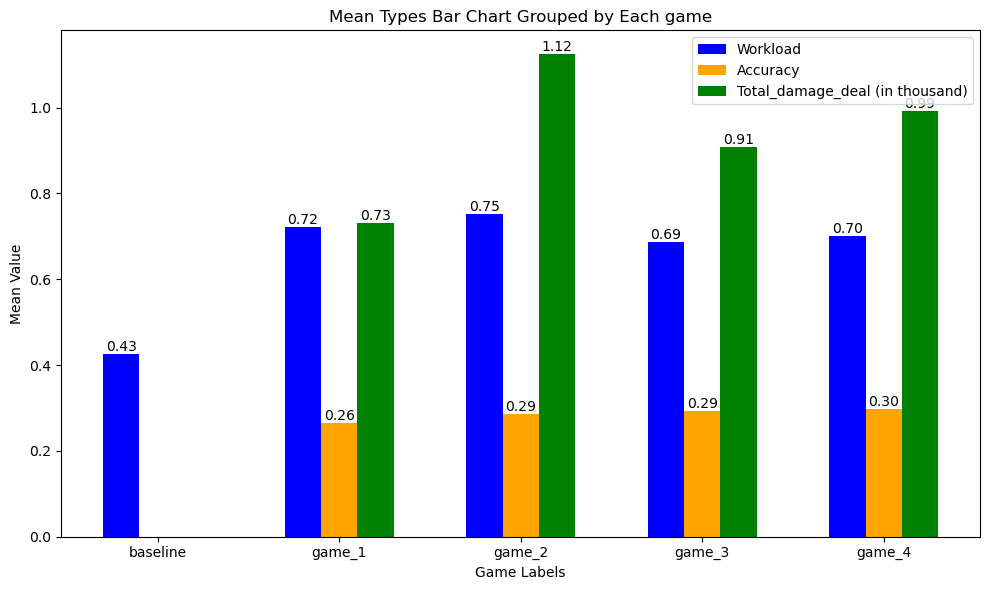

In [25]:
# Filter the DataFrame based on the condition 'Missing_percent' > 0.7
filtered_df = data_df_normalize[data_df_normalize['Missing_percent'] > 0.7]

# Calculate accuracy
filtered_df['Accuracy'] = filtered_df['Total_shot_hit'] / filtered_df['Total_shot_all']
filtered_df['Total_damage_deal'] = filtered_df['Total_damage_deal'] / 1000

# Melt the DataFrame to combine the three columns into one 'Type' column
melted_df = filtered_df.melt(id_vars=['Block_type'], value_vars=['Workload', 'Accuracy', 'Total_damage_deal'], var_name='Type', value_name='Value')

# Calculate median values for each damage type grouped by Block_type
mean_df = melted_df.groupby(['Block_type', 'Type'])['Value'].mean().reset_index()

# Calculate the mean values
total_damage_mean = melted_df[melted_df['Type'] == 'Workload'].groupby('Block_type')['Value'].mean()
gun_damage_mean = melted_df[melted_df['Type'] == 'Accuracy'].groupby('Block_type')['Value'].mean()
rocket_damage_mean = melted_df[melted_df['Type'] == 'Total_damage_deal'].groupby('Block_type')['Value'].mean()

# Create the bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(total_damage_mean))

# Plot the bars
bars1 = plt.bar(index - bar_width, total_damage_mean.values, bar_width, color='blue', label='Workload')
bars2 = plt.bar(index, gun_damage_mean.values, bar_width, color='orange', label='Accuracy')
bars3 = plt.bar(index + bar_width, rocket_damage_mean.values, bar_width, color='green', label='Total_damage_deal (in thousand)')

# Add value annotations on top of each bar
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')
    
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')
    
for bar in bars3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

# Customizing plot labels and title
plt.title('Mean Types Bar Chart Grouped by Each game')
plt.xlabel('Game Labels')
plt.ylabel('Mean Value')
plt.xticks([0,1,2,3,4], ['baseline','game_1','game_2','game_3','game_4'])  # Adjust the xticks to match your data
plt.legend()
plt.tight_layout()
plt.savefig(SAVE_DIR + "mean_bar_chart_workload_accuracy_total_damage.png", dpi=500)
plt.show()


/tmp/ipykernel_99137/3209439461.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Total_damage_deal'] = filtered_df['Total_damage_deal'] / 1000


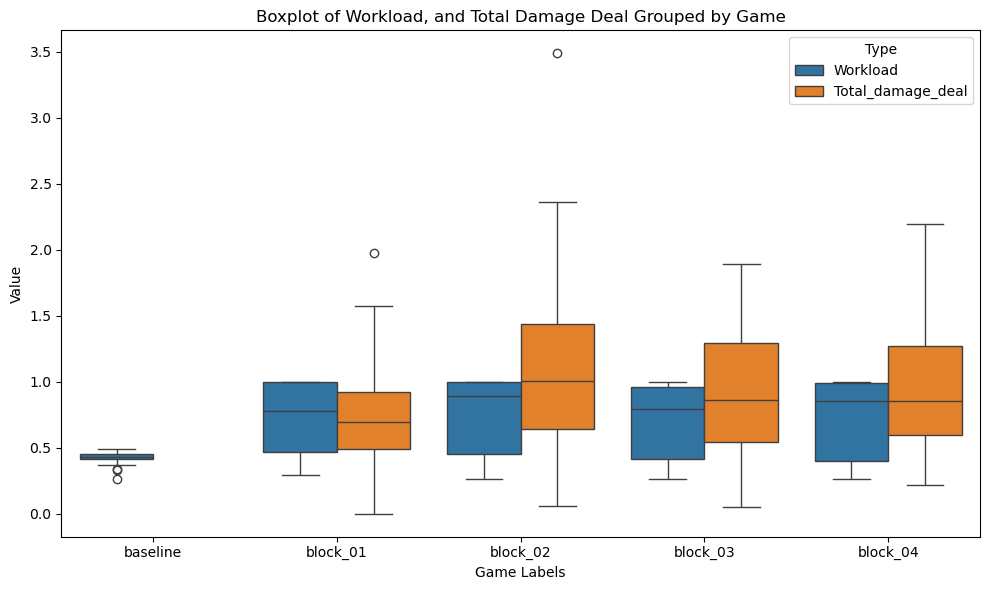

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter the DataFrame based on the condition 'Missing_percent' > 0.7
filtered_df = data_df_normalize[data_df_normalize['Missing_percent'] > 0.7]

# Calculate accuracy
#filtered_df['Accuracy'] = filtered_df['Total_shot_hit'] / filtered_df['Total_shot_all']
# Assuming filtered_df is already prepared and melted_df is created as you mentioned
filtered_df['Total_damage_deal'] = filtered_df['Total_damage_deal'] / 1000

melted_df = filtered_df.melt(id_vars=['Block_type'], value_vars=['Workload', 'Total_damage_deal'], var_name='Type', value_name='Value')

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Block_type', y='Value', hue='Type', data=melted_df)

# Customizing plot labels and title
plt.title('Boxplot of Workload, and Total Damage Deal Grouped by Game')
plt.xlabel('Game Labels')
plt.ylabel('Value')
plt.legend(title='Type')
plt.tight_layout()
plt.savefig(SAVE_DIR + "boxplot_workload_accuracy_total_damage.png", dpi=500)
plt.show()


In [34]:
dict_map = {
    'baseline' : 'baseline',
    'block_01' : 'game_1',
    'block_02' : 'game_2',
    'block_03' : 'game_3',
    'block_04' : 'game_4',
}

/tmp/ipykernel_99137/3431776542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Block_type'] = filtered_df['Block_type'].map(dict_map)


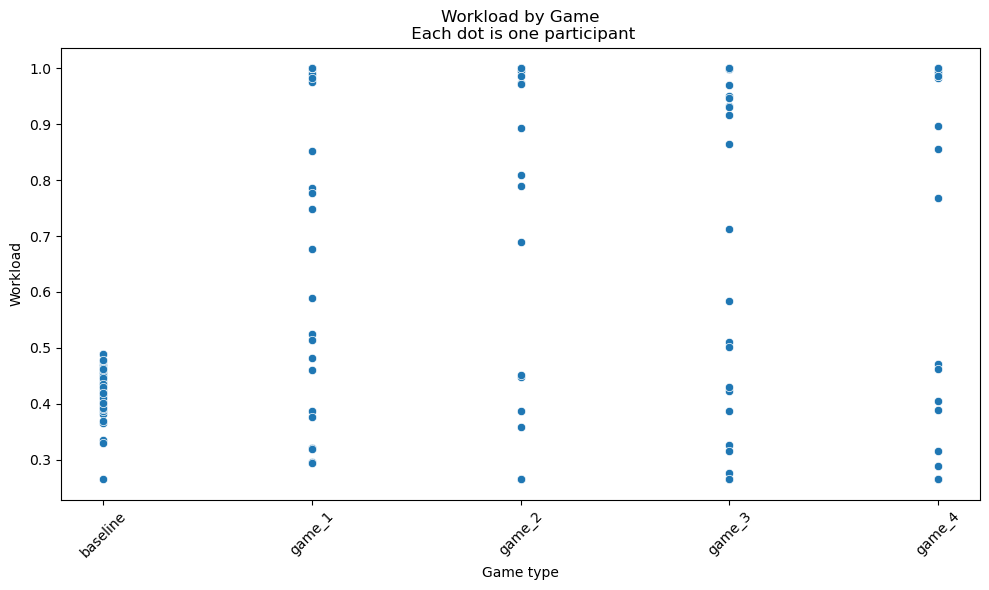

In [35]:
filtered_df = data_df_normalize[data_df_normalize['Missing_percent'] > 0.7]
filtered_df['Block_type'] = filtered_df['Block_type'].map(dict_map)

# Create a scatter plot with Block_type on x-axis and Workload on y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Block_type', y='Workload', data=filtered_df)

# Customizing the plot
plt.title('Workload by Game\n Each dot is one participant')
plt.xlabel('Game type')
plt.ylabel('Workload')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()

# Display the plot
plt.savefig(SAVE_DIR + "scatter_workload_game_type.png", dpi=500)
plt.show()


/tmp/ipykernel_99137/1425213858.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Block_type'] = filtered_df['Block_type'].map(dict_map)


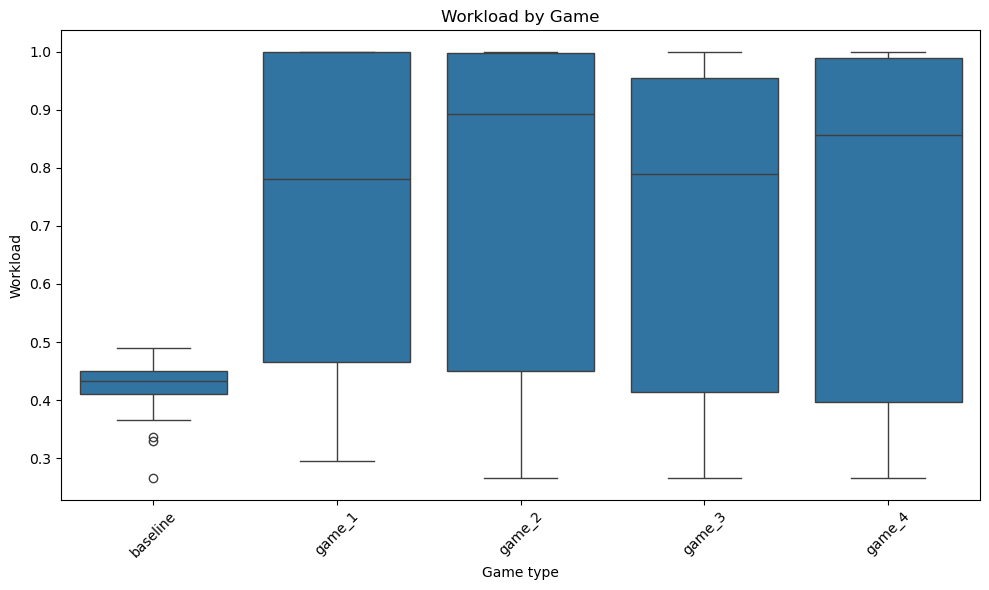

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df = data_df_normalize[data_df_normalize['Missing_percent'] > 0.7]
filtered_df['Block_type'] = filtered_df['Block_type'].map(dict_map)

# Create a boxplot with Block_type on x-axis and Workload on y-axis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Block_type', y='Workload', data=filtered_df)

# Customizing the plot
plt.title('Workload by Game')
plt.xlabel('Game type')
plt.ylabel('Workload')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()

# Display the plot
plt.savefig(SAVE_DIR + "boxplot_workload_game_type.png", dpi=500)
plt.show()


/tmp/ipykernel_99137/1867361407.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Block_type'] = filtered_df['Block_type'].map(dict_map)
/tmp/ipykernel_99137/1867361407.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Block_type_num'] = filtered_df['Block_type'].astype('category').cat.codes
/tmp/ipykernel_99137/1867361407.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

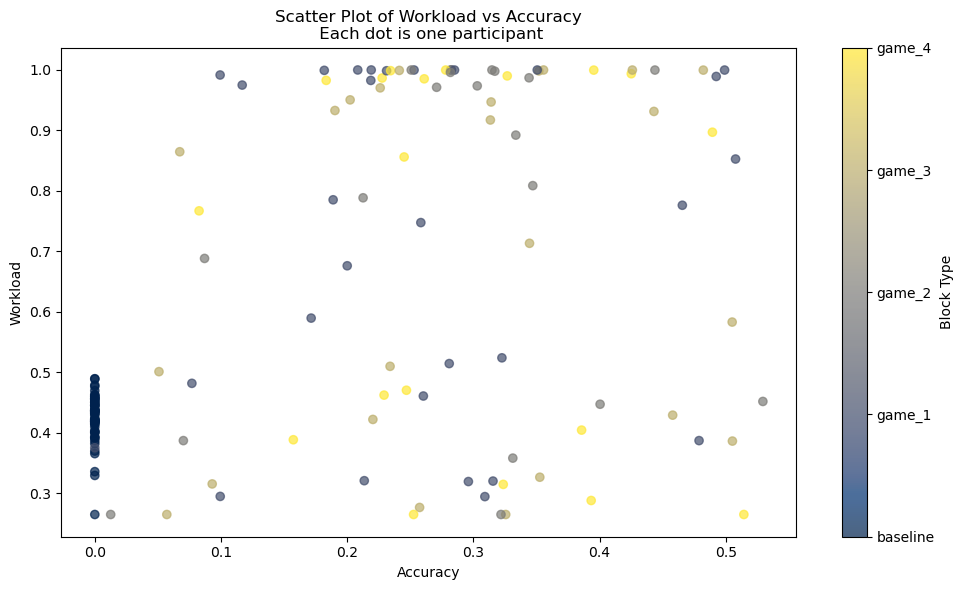

In [37]:
# Filter the DataFrame based on the condition 'Missing_percent' > 0.7
filtered_df = data_df_normalize[data_df_normalize['Missing_percent'] > 0.7]

# Map 'Block_type' using 'dict_map' (as per your original code)
filtered_df['Block_type'] = filtered_df['Block_type'].map(dict_map)
filtered_df['Block_type_num'] = filtered_df['Block_type'].astype('category').cat.codes

# Calculate Accuracy if not already done
filtered_df['Accuracy'] = filtered_df['Total_shot_hit'] / filtered_df['Total_shot_all']
filtered_df.loc[filtered_df['Block_type'] == 'baseline','Accuracy'] = 0

# Create a scatter plot with Accuracy on x-axis, Workload on y-axis, and color by Block_type_num
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=filtered_df['Accuracy'], y=filtered_df['Workload'], 
                      c=filtered_df['Block_type_num'], cmap='cividis', alpha=0.7)

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Block Type')
cbar.set_ticks([0,1,2,3,4],labels=['baseline','game_1','game_2','game_3','game_4'])

# Customizing the plot
plt.title('Scatter Plot of Workload vs Accuracy\n Each dot is one participant')
plt.xlabel('Accuracy')
plt.ylabel('Workload')
plt.tight_layout()

# Save and display the plot
plt.savefig(SAVE_DIR + "scatter_workload_accuracy.png", dpi=500)
plt.show()


/tmp/ipykernel_99137/3207156623.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Block_type'] = filtered_df['Block_type'].map(dict_map)
/tmp/ipykernel_99137/3207156623.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Block_type_num'] = filtered_df['Block_type'].astype('category').cat.codes
/tmp/ipykernel_99137/3207156623.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



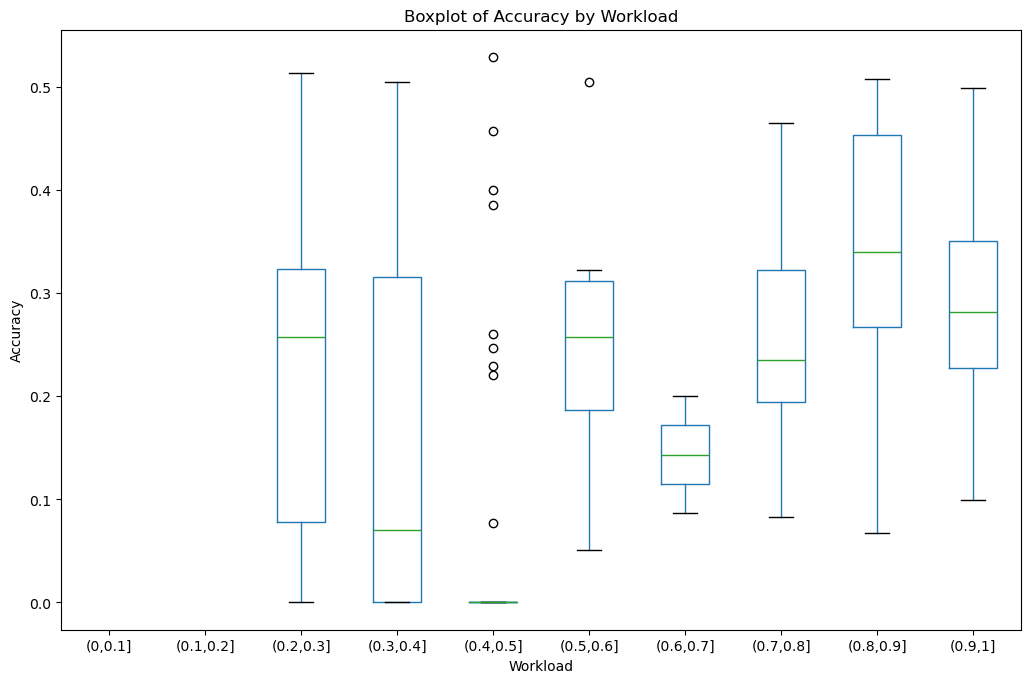

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter the DataFrame based on the condition 'Missing_percent' > 0.7
filtered_df = data_df_normalize[data_df_normalize['Missing_percent'] > 0.7]

# Map 'Block_type' using 'dict_map'
filtered_df['Block_type'] = filtered_df['Block_type'].map(dict_map)
filtered_df['Block_type_num'] = filtered_df['Block_type'].astype('category').cat.codes

# Calculate Accuracy if not already done
filtered_df['Accuracy'] = filtered_df['Total_shot_hit'] / filtered_df['Total_shot_all']
filtered_df.loc[filtered_df['Block_type'] == 'baseline', 'Accuracy'] = 0

# Group Workload into 10 equal-sized bins
filtered_df['Workload_group'] = pd.cut(filtered_df['Workload'], bins=[i/10 for i in range(11)], labels=False)

# Ensure all groups are represented, even if empty
workload_groups = pd.DataFrame({'Workload_group': range(10)})
merged_df = pd.merge(filtered_df, workload_groups, on='Workload_group', how='right')

# Plot the boxplot
merged_df.boxplot(column='Accuracy', by='Workload_group', grid=False, figsize=(12,8))
plt.title('Boxplot of Accuracy by Workload')
plt.suptitle('')
plt.xlabel('Workload')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(1, 11), labels=['(0,0.1]','(0.1,0.2]','(0.2,0.3]','(0.3,0.4]','(0.4,0.5]','(0.5,0.6]','(0.6,0.7]','(0.7,0.8]','(0.8,0.9]','(0.9,1]'])
plt.savefig(SAVE_DIR + "boxplot_workload_accuracy.png", dpi=500)
plt.show()


/tmp/ipykernel_99137/1228011762.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Block_type'] = filtered_df['Block_type'].map(dict_map)
/tmp/ipykernel_99137/1228011762.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Block_type_num'] = filtered_df['Block_type'].astype('category').cat.codes


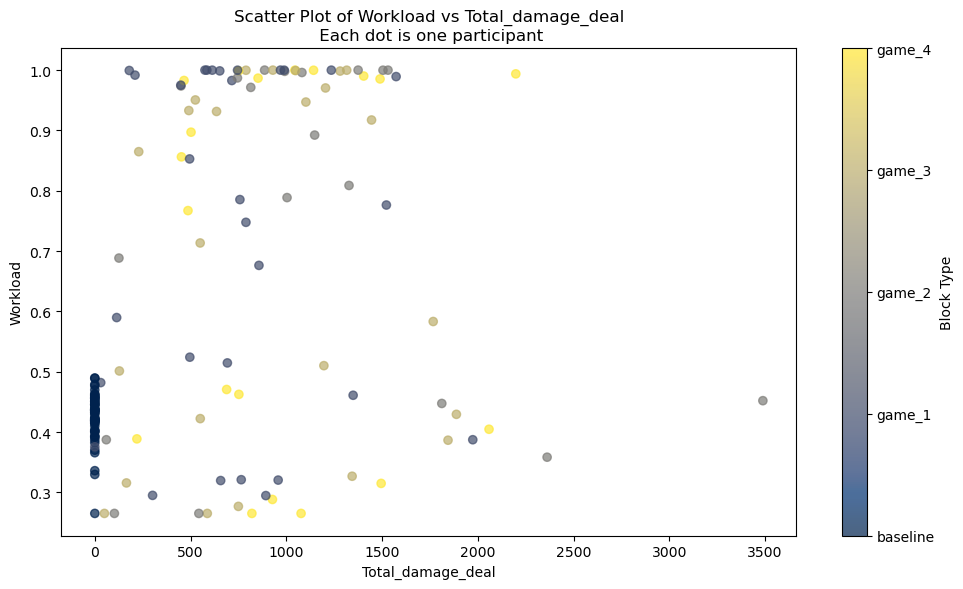

In [29]:
# Filter the DataFrame based on the condition 'Missing_percent' > 0.7
filtered_df = data_df_normalize[data_df_normalize['Missing_percent'] > 0.7]

# Map 'Block_type' using 'dict_map' (as per your original code)
filtered_df['Block_type'] = filtered_df['Block_type'].map(dict_map)
filtered_df['Block_type_num'] = filtered_df['Block_type'].astype('category').cat.codes

# Calculate Total_damage_deal if not already done
filtered_df.loc[filtered_df['Block_type'] == 'baseline','Total_damage_deal'] = 0

# Create a scatter plot with Total_damage_deal on x-axis, Workload on y-axis, and color by Block_type_num
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=filtered_df['Total_damage_deal'], y=filtered_df['Workload'], 
                      c=filtered_df['Block_type_num'], cmap='cividis', alpha=0.7)

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Block Type')
cbar.set_ticks([0,1,2,3,4],labels=['baseline','game_1','game_2','game_3','game_4'])

# Customizing the plot
plt.title('Scatter Plot of Workload vs Total_damage_deal\n Each dot is one participant')
plt.xlabel('Total_damage_deal')
plt.ylabel('Workload')
plt.tight_layout()

# Save and display the plot
plt.savefig(SAVE_DIR + "scatter_workload_total_damage_deal.png", dpi=500)
plt.show()


/tmp/ipykernel_99137/2285019686.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Block_type'] = filtered_df['Block_type'].map(dict_map)
/tmp/ipykernel_99137/2285019686.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Block_type_num'] = filtered_df['Block_type'].astype('category').cat.codes
/tmp/ipykernel_99137/2285019686.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

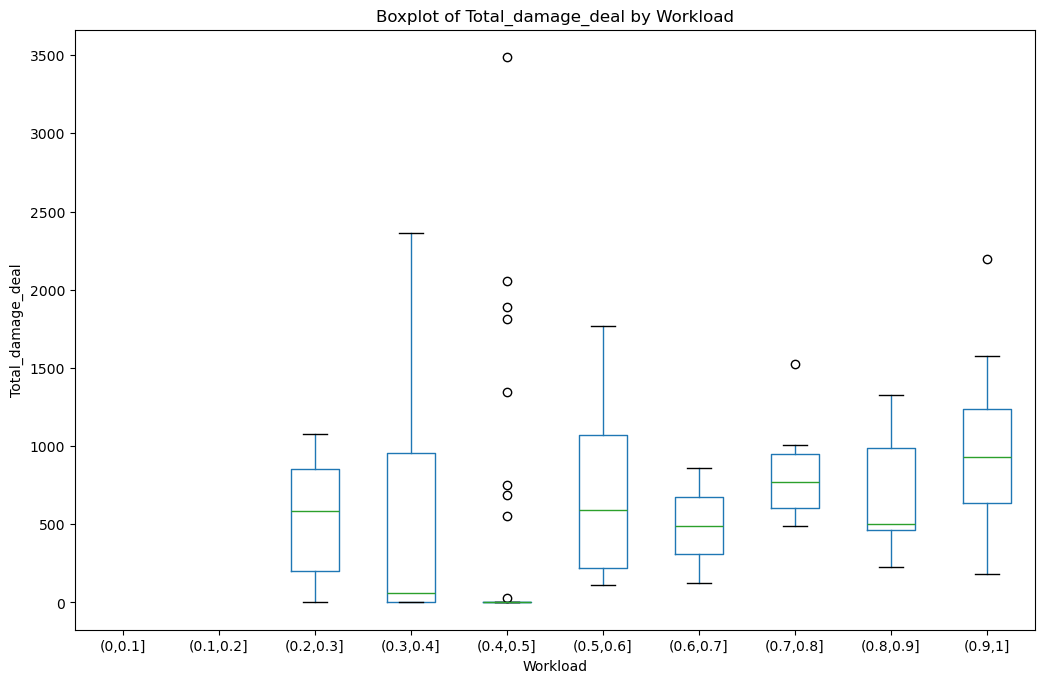

In [51]:
# Filter the DataFrame based on the condition 'Missing_percent' > 0.7
filtered_df = data_df_normalize[data_df_normalize['Missing_percent'] > 0.7]

# Map 'Block_type' using 'dict_map' (as per your original code)
filtered_df['Block_type'] = filtered_df['Block_type'].map(dict_map)
filtered_df['Block_type_num'] = filtered_df['Block_type'].astype('category').cat.codes

# Calculate Total_damage_deal if not already done
filtered_df.loc[filtered_df['Block_type'] == 'baseline','Total_damage_deal'] = 0

# Group Workload into 10 equal-sized bins
filtered_df['Workload_group'] = pd.cut(filtered_df['Workload'], bins=[i/10 for i in range(11)], labels=False)

# Ensure all groups are represented, even if empty
workload_groups = pd.DataFrame({'Workload_group': range(10)})
merged_df = pd.merge(filtered_df, workload_groups, on='Workload_group', how='right')

# Plot the boxplot
merged_df.boxplot(column='Total_damage_deal', by='Workload_group', grid=False, figsize=(12,8))
plt.title('Boxplot of Total_damage_deal by Workload')
plt.suptitle('')
plt.xlabel('Workload')
plt.ylabel('Total_damage_deal')
plt.xticks(ticks=range(1, 11), labels=['(0,0.1]','(0.1,0.2]','(0.2,0.3]','(0.3,0.4]','(0.4,0.5]','(0.5,0.6]','(0.6,0.7]','(0.7,0.8]','(0.8,0.9]','(0.9,1]'])
plt.savefig(SAVE_DIR + "boxplot_workload_total_damage_deal.png", dpi=500)
plt.show()
